In [1]:
import FinanceDataReader as fdr

In [5]:
samsung = fdr.DataReader('005930', start = '01/01/2016')

In [6]:
print(samsung.head())

             Open   High    Low  Close  Volume    Change
Date                                                    
2016-01-04  25200  25200  24100  24100  306939 -0.043651
2016-01-05  24040  24360  23720  24160  216002  0.002490
2016-01-06  24160  24160  23360  23500  366752 -0.027318
2016-01-07  23320  23660  23020  23260  282388 -0.010213
2016-01-08  23260  23720  23260  23420  257763  0.006879


In [7]:
print(samsung.tail())

              Open    High     Low   Close    Volume    Change
Date                                                          
2026-02-11  164000  168600  162000  167800  22760242  0.012063
2026-02-12  171200  179600  170100  178600  41296011  0.064362
2026-02-13  179500  184400  178900  181200  34454192  0.014558
2026-02-19  188000  190900  187100  190000  27049388  0.048565
2026-02-20  190000  190300  188600  189750  18357836 -0.001316


In [8]:
print(samsung.describe())

                Open           High            Low          Close  \
count    2485.000000    2485.000000    2485.000000    2485.000000   
mean    59170.693360   59774.327565   58579.472837   59233.215292   
std     20282.614153   20604.551843   20022.415862   20242.342591   
min         0.000000       0.000000       0.000000   22520.000000   
25%     46450.000000   46900.000000   46000.000000   46480.000000   
50%     56900.000000   57500.000000   56100.000000   56800.000000   
75%     71300.000000   71900.000000   70700.000000   71300.000000   
max    190000.000000  190900.000000  188600.000000  190000.000000   

             Volume       Change  
count  2.485000e+03  2485.000000  
mean   1.315936e+07     0.000965  
std    1.029227e+07     0.017490  
min    0.000000e+00    -0.103015  
25%    6.775614e+06    -0.009524  
50%    1.274900e+07     0.000000  
75%    1.844439e+07     0.010148  
max    9.030618e+07     0.113697  


In [9]:
print(samsung.info)

<bound method DataFrame.info of               Open    High     Low   Close    Volume    Change
Date                                                          
2016-01-04   25200   25200   24100   24100    306939 -0.043651
2016-01-05   24040   24360   23720   24160    216002  0.002490
2016-01-06   24160   24160   23360   23500    366752 -0.027318
2016-01-07   23320   23660   23020   23260    282388 -0.010213
2016-01-08   23260   23720   23260   23420    257763  0.006879
...            ...     ...     ...     ...       ...       ...
2026-02-11  164000  168600  162000  167800  22760242  0.012063
2026-02-12  171200  179600  170100  178600  41296011  0.064362
2026-02-13  179500  184400  178900  181200  34454192  0.014558
2026-02-19  188000  190900  187100  190000  27049388  0.048565
2026-02-20  190000  190300  188600  189750  18357836 -0.001316

[2485 rows x 6 columns]>


In [11]:
print(samsung.shape)

(2485, 6)


In [12]:
import numpy as np
def make_samsung_data(data, window) :
    train = []
    target = []
    for i in range(data.size - window) :
        train.append(data[i:i+window])    # n개씩 묶기
        target.append(data[i+window])     # n개씩에 대한 1개의 정답표
    return np.array (train), np.array(target)

In [14]:
# 정규화를 해야함
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [20]:
scaled_data = scaler.fit_transform(samsung[['Open']])
print(scaled_data)

[[0.13263158]
 [0.12652632]
 [0.12715789]
 ...
 [0.94473684]
 [0.98947368]
 [1.        ]]


In [21]:
print(scaled_data.shape)

(2485, 1)


In [22]:
TEST_SIZE = 200
train_data = scaled_data[:-TEST_SIZE]
test_data = scaled_data[-TEST_SIZE:]

In [23]:
(X_train, y_train) = make_samsung_data(train_data, 30)
(X_test, y_test) = make_samsung_data(test_data, 30)

In [24]:
print(X_train.shape)

(2255, 30, 1)


In [25]:
print(y_train.shape)

(2255, 1)


In [26]:
print(y_train[0])

[0.12663158]


In [27]:
import tensorflow as tf
model = tf.keras.models.Sequential()
input_layer = tf.keras.layers.Input(shape=(30,1))
model.add(input_layer)
model.add(tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(128, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(1, return_sequences=False, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,664 (776.03 KB)

 Trainable params: 198,664 (776.03 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.0013 - loss: 0.0070
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0013 - loss: 5.5157e-04
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0013 - loss: 4.1522e-04
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0013 - loss: 3.8480e-04
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0013 - loss: 3.8672e-04
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0013 - loss: 3.6920e-04    
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0013 - loss: 3.6500e-04    
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0013 - loss: 3.0927e-04
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0013 - loss: 2.8717e-04
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0013 - loss: 2.8745e-04
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0013 - loss: 2.9024e-04
Epoc

In [30]:
model.save("SAMSUNG_STICK.keras")

In [31]:
predicts = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


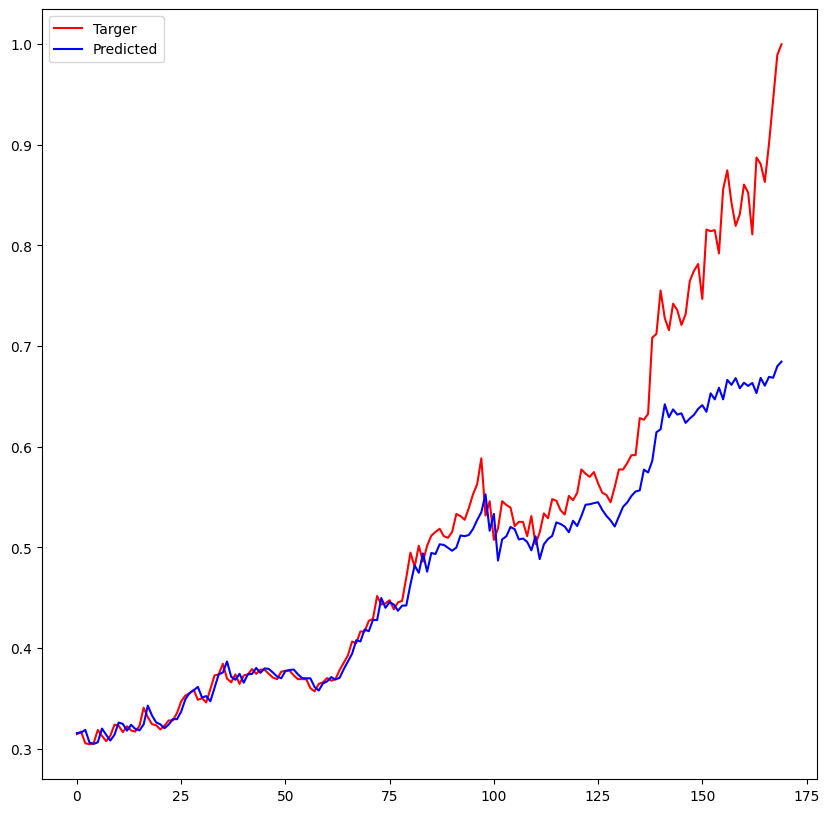

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(y_test, color = 'red', label = 'Targer')
plt.plot(predicts, color = 'blue', label = 'Predicted')
plt.legend(loc = 'best')
plt.show()